# Diabetes con machine learning - algoritmos supervisados

###  importacion de librerias

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
diab = pd.read_csv('diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###  Medidas de la glucosa

<img src="emo.jpg" width=275 height=380>

In [137]:
diab2 = diab[(diab['BMI']!=0) & (diab['BloodPressure']!=0) & (diab['Insulin']!=0)]
diab2.count()

Pregnancies                 393
Glucose                     393
BloodPressure               393
SkinThickness               393
Insulin                     393
BMI                         393
DiabetesPedigreeFunction    393
Age                         393
Outcome                     393
dtype: int64

In [138]:
diab2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [139]:
print("valor maxino de Embarazo: ",diab2['Pregnancies'].max(),"valor minimo", diab2['Pregnancies'].min())
print("valor maxino de Glucose: ",diab2['Glucose'].max(),"valor minimo", diab2['Glucose'].min())
print("valor maxino de BloodPressure: ",diab2['BloodPressure'].max(),"valor minimo", diab2['BloodPressure'].min())
print("valor maxino de SkinThickness: ",diab2['SkinThickness'].max(),"valor minimo", diab2['SkinThickness'].min())
print("valor maxino de Insulin: ",diab2['Insulin'].max(),"valor minimo", diab2['Insulin'].min())
print("valor maxino de BMI: ",diab2['BMI'].max(),"valor minimo", diab2['BMI'].min())
print("valor maxino de DiabetesPedigreeFunction: ",diab2['DiabetesPedigreeFunction'].max(),"valor minimo", diab2['DiabetesPedigreeFunction'].min())
print("valor maxino de Age: ",diab2['Age'].max(),"valor minimo", diab2['Age'].min())

valor maxino de Embarazo:  17 valor minimo 0
valor maxino de Glucose:  198 valor minimo 0
valor maxino de BloodPressure:  110 valor minimo 24
valor maxino de SkinThickness:  63 valor minimo 7
valor maxino de Insulin:  846 valor minimo 14
valor maxino de BMI:  67.1 valor minimo 18.2
valor maxino de DiabetesPedigreeFunction:  2.42 valor minimo 0.085
valor maxino de Age:  81 valor minimo 21


In [140]:
len(diab2), max(diab2['Pregnancies'])

(393, 17)

In [141]:
diab = diab2
diab2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 3 to 765
Data columns (total 9 columns):
Pregnancies                 393 non-null int64
Glucose                     393 non-null int64
BloodPressure               393 non-null int64
SkinThickness               393 non-null int64
Insulin                     393 non-null int64
BMI                         393 non-null float64
DiabetesPedigreeFunction    393 non-null float64
Age                         393 non-null int64
Outcome                     393 non-null int64
dtypes: float64(2), int64(7)
memory usage: 30.7 KB


###  Gráficas

####  Glucosa

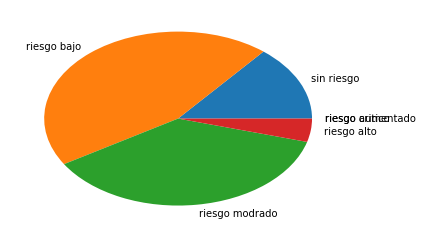

In [142]:
s_r = diab.Glucose[diab['Glucose']<90]
r_b = diab.Glucose[(diab['Glucose']>=90) & (diab['Glucose']<126)]
r_m = diab.Glucose[(diab['Glucose']>=126) & (diab['Glucose']<183)]
r_a = diab.Glucose[(diab['Glucose']>=183) & (diab['Glucose']<240)]
r_aa = diab.Glucose[(diab['Glucose']>=240) & (diab['Glucose']<298)]
r_c = diab.Glucose[(diab['Glucose']>=298) & (diab['Glucose']<330)]


gg=[len(s_r), len(r_b), len(r_m), len(r_a), len(r_aa), len(r_c)]

plt.pie(gg, labels=['sin riesgo','riesgo bajo', 'riesgo modrado', 'riesgo alto', 'riesgo aumentado', 'riesgo critico'])
plt.show()

#### Edad

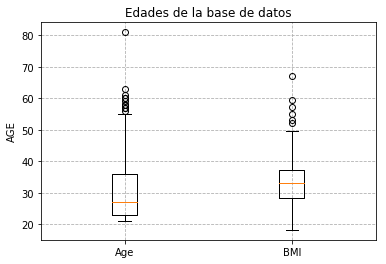

In [143]:
plt.boxplot([diab['Age'], diab['BMI']], labels=['Age','BMI'])
plt.grid(linestyle='--')
plt.title("Edades de la base de datos")
plt.ylabel('AGE')
plt.show()

#### Presion de sangre

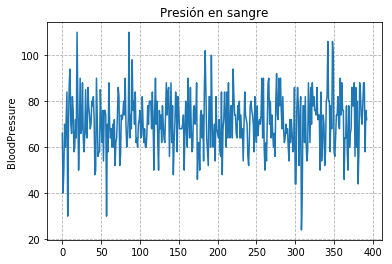

In [144]:
plt.plot(range(len(diab)),diab['BloodPressure'])
plt.grid(linestyle='--')
plt.title("Presión en sangre")
plt.ylabel('BloodPressure')
plt.show()

####  Barras

Text(0.5,0,'# de orden del paciente')

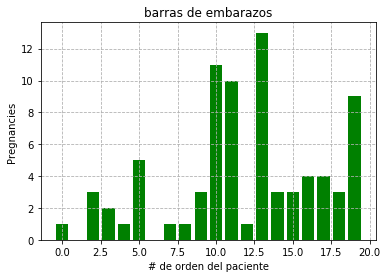

In [145]:
rango_bar = 20

plt.bar(range(len(diab[:rango_bar])),diab['Pregnancies'][:rango_bar], color='g')
plt.grid(linestyle='--')
plt.title('barras de embarazos')
plt.ylabel('Pregnancies')
plt.xlabel('# de orden del paciente')

####  

###  KNN

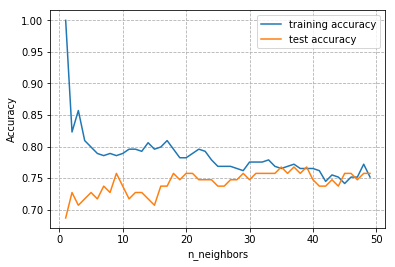

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

income, outcome = diab.drop(columns=['Outcome']), diab['Outcome']

X_train, X_test, y_train, y_test = train_test_split(income, outcome, stratify=outcome,random_state=66)#random_state=66,,,  test_size=0.1

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 50
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.grid(linestyle='--')

In [147]:
#clf = KNeighborsClassifier(n_neighbors=)
#clf.predict([],)
#neighbors_settings[max(test_accuracy)]
#test_accuracy, 
max(test_accuracy)

0.7676767676767676

In [148]:
km = test_accuracy.index(max(test_accuracy)) #mejor k
km

34

In [149]:
clf = KNeighborsClassifier(n_neighbors=km)
clf.fit(diab.drop(columns=['Outcome']), diab['Outcome'])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=34, p=2,
           weights='uniform')

In [150]:
clf.predict([[6,148,72,35,0,33.6,0.627,50],])

array([0])

In [151]:
income_diab = diab.drop(columns=['Outcome'])
ii=0

#clf.predict([income_dia.loc[ii,'Outcome']
diab['Outcome'].iloc[0]

0

In [152]:
#for i in range(100):
#    print(clf.predict([income_diab.loc[i],]), diab.loc[i,'Outcome'])

for i in range(len(diab)):
    #print(clf.predict([income_diab.iloc[i],]))#, diab.loc[i,'Outcome'])
    if clf.predict([income_diab.iloc[i],]) == diab['Outcome'].iloc[i]:
        ii+=1
print("numeor de coincidencias",ii,"de",len(diab))
print("probabilidad de coincidencias %0.2f%%"% (ii/len(diab)*100))

numeor de coincidencias 300 de 393
probabilidad de coincidencias 76.34%


###  Support vector machine

In [153]:
from sklearn.svm import SVC

In [154]:
X, y  = X_train, y_train   #diab.drop(columns=['Outcome']), diab['Outcome']

#X_test

In [155]:
clf2 = SVC(gamma='auto')  #instanciamos la clase SVC
clf2.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [156]:
clf2.fit(X, y), clf2.score(X_train, y_train), clf.score(X_test, y_test)

(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False), 1.0, 0.7474747474747475)

In [157]:
income_diab = diab.drop(columns=['Outcome'])
ii=0

for i in range(len(diab)):
    #print(clf2.predict([income_diab.loc[i],]), diab.loc[i,'Outcome'])
    if clf2.predict([income_diab.iloc[i],]) == diab['Outcome'].iloc[i]:
    #if clf2.predict([income_diab.iloc[i],]) == diab.loc[i,'Outcome']:
        ii+=1
print("numeor de coincidencias",ii,'de',len(diab))
print("probabilidad de coincidencias %0.2f%%"% (ii/len(diab)*100))

numeor de coincidencias 360 de 393
probabilidad de coincidencias 91.60%


### Random forest

In [158]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [159]:
X, y  = X_train, y_train   #diab.drop(columns=['Outcome']), diab['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .4, random_state=4)


In [160]:
clf = RandomForestClassifier(n_estimators = 5, criterion='gini', random_state=None)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)

#print(pred)
#print(y_test)
print("probabilidad de coincidencias %0.2f%%"% (metrics.accuracy_score(y_test, pred)*100))


probabilidad de coincidencias 72.03%


### Cross Validation: parameter tuning

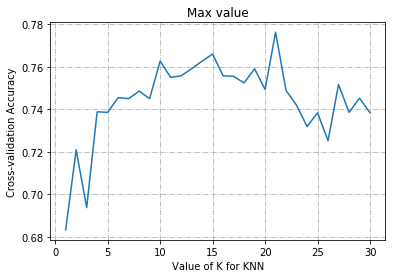

In [161]:
from sklearn.model_selection import cross_val_score

k_range = list(range(1,31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validation Accuracy')
plt.title('Max value')
plt.grid(linestyle='-.')
#print(k_scores)
#k_scores.index(max(k_range))

In [162]:
km2 = k_scores.index(max(k_scores)) #mejor k
km2

20

### Cross validation

In [163]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import neighbors, datasets

In [164]:
X, y  = X_train, y_train   #diab.drop(columns=['Outcome']), diab['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .4, random_state=4)

In [165]:
knn = neighbors.KNeighborsClassifier(n_neighbors=km2)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.72222222 0.72222222 0.94444444 0.72222222 0.66666667 0.66666667
 0.88888889 0.70588235 0.76470588 0.875     ]


In [166]:
print(scores.mean())

0.767892156862745
